##**BITS F464 - Semester 1 - MACHINE LEARNING**
--------------------------------------------------------------------------------

**PROJECT - MACHINE LEARNING FOR SUSTAINABLE DEVELOPMENT GOALS (SDGs)**
--------------------------------------------------------------------------------
***Team number: 37***

---
(*In Title case, separated with commas*)
***Full names of all students in the team: Aayush Roy, Devansh Verma, Yash Kant, Gaurav Jakhar***

---
(*Separated by commas*)
***Id number of all students in the team: 2021A3PS2801H, 2021A8PS1687H, 2021A3PS2635H, 2022H1030064H***


Please refer to the email providing the assignment of project and follow the instructions provided in the project brief.


# **0. Importing Necessary Libraries**

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
from google.colab import files
from sklearn import preprocessing
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# **_1. Preprocessing of Dataset_**

### The respective dataset has been shared in the project brief. Please refer to it.

In [124]:
#Uploading csv files

uploaded = files.upload()

Saving water_portability.csv to water_portability.csv


In [125]:
#Reading the database and storing in pandas dataframe

df = df = pd.read_csv(io.BytesIO(uploaded['water_portability.csv']))
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [126]:
#Shuffling the Database

df = df.sample(frac = 1).reset_index()
df.head()

,index,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,2272,8.384296,223.328185,27463.654795,6.476753,352.952803,318.042648,10.645164,64.209337,3.460998,0
1,1820,6.643027,205.233119,20511.369240,5.908111,313.353813,455.693256,16.021941,52.153472,3.709989,0
2,2674,6.490923,189.031588,30453.623186,6.060119,297.512799,476.916726,14.973970,47.012889,4.372333,0
3,2312,6.266378,163.385405,28141.216497,8.508751,376.870555,295.675137,9.938445,50.159734,2.936611,1
4,457,7.240351,201.997196,14462.674308,6.737176,314.043137,534.800988,14.213794,82.945817,3.782972,0


In [127]:
df = df.drop(['index'],axis = 1)

In [128]:
#Prelimanary Analysis

rows = df.shape[0]
cols = df.shape[1]

null_count = df.isnull().sum().sum()

print("No. of Records: {}".format(rows))
print("No. of Features: {}".format(cols))
print("Total no. of NUll Values: {}".format(null_count))
df.head()

No. of Records: 3276
No. of Features: 10
Total no. of NUll Values: 1434


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,8.384296,223.328185,27463.654795,6.476753,352.952803,318.042648,10.645164,64.209337,3.460998,0
1,6.643027,205.233119,20511.369240,5.908111,313.353813,455.693256,16.021941,52.153472,3.709989,0
2,6.490923,189.031588,30453.623186,6.060119,297.512799,476.916726,14.973970,47.012889,4.372333,0
3,6.266378,163.385405,28141.216497,8.508751,376.870555,295.675137,9.938445,50.159734,2.936611,1
4,7.240351,201.997196,14462.674308,6.737176,314.043137,534.800988,14.213794,82.945817,3.782972,0


#### We have 10 features out of which 9 are input features and we will use the Outcome feature as the target variable

In [129]:
sd = df.interpolate(method = 'linear')
sd = sd.dropna()
sd.isnull().sum().sum()

0

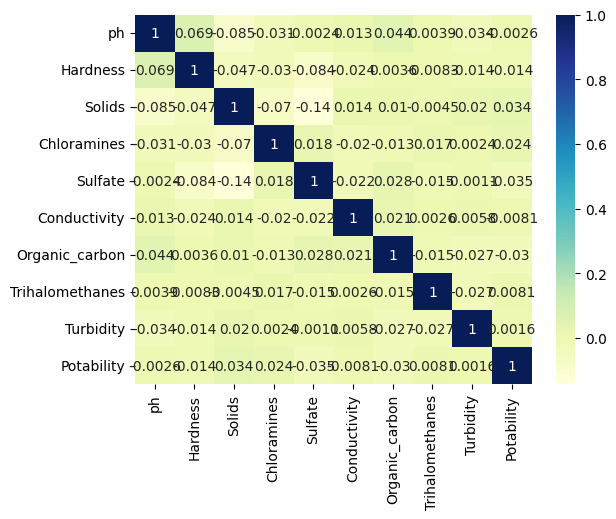

In [130]:
##Correlation Ana
sns.heatmap(sd.corr(), cmap="YlGnBu", annot = True)
plt.show()

#### We can clearly see that all features are comparably correlated with Potablility so we will use all the features for prediction

In [131]:
##Train Test Splitting
sd_train = sd.sample(frac = 0.5)
sd_test = sd.drop(sd_train.index)

x_test = sd_test.drop(columns = ['Potability'], axis=1)
y_test = sd_test['Potability'].values.reshape(sd_test.shape[0],1)

x_train = sd_train.drop(columns = ['Potability'])
y_train = sd_train['Potability'].values.reshape(sd_train.shape[0],1)

## Feature Scaling

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_x_train = sx.fit_transform(x_train.to_numpy()) ##scaled_x
scaled_x_test = sx.fit_transform(x_test.to_numpy())

# ***2. Perceptron***

The first algorithm that we have implemented for this project is a Single Layer Perceptron.\
The fit function uses the perceptron algorithm i.e it updates the weights for all misclassified points and repeats this for 10,000 iterations.\
An Important thing to note is that we have kept track of the accuracy as the no. of iterations increase.\
Finally the weights with maximum accuracy are learnt by the model and the accuracies for different values of iterations at interval of 10 are plotted on a graph

In [132]:
class Perceptron:

  def __init__ (self):
    self.weights = None
    self.bias = None

  def model(self, x):
    return 1 if (np.dot(self.weights, x) >= self.bias) else 0

  def predict(self, X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)

  def fit(self, X, Y, iters = 1, lr = 1):

    self.weights = np.ones(X.shape[1])
    self.bias = 0

    accuracy = {}
    max_accuracy = 0         # Stores the maximum accuracy achieved

    wt_matrix = []

    for i in range(iters):
      for x, y in zip(X, Y):
        y_pred = self.model(x)
        if y == 1 and y_pred == 0:
          self.weights = self.weights + lr * x
          self.bias = self.bias - lr * 1
        elif y == 0 and y_pred == 1:
          self.weights = self.weights - lr * x
          self.bias = self.bias + lr * 1

      wt_matrix.append(self.weights)

      accur_score = accuracy_score(self.predict(X), Y)
      if (accur_score > max_accuracy):
        max_accuracy = accur_score
        chkptw = self.weights
        chkptb = self.bias

      if (i%10 == 0):
        accuracy[i] = accur_score

    self.weights = chkptw
    self.bias = chkptb

    # print(max_accuracy)

    plt.plot(accuracy.values())          ## Plots accuracy for different no. of iterations
    plt.ylim([0, 1])
    plt.show()


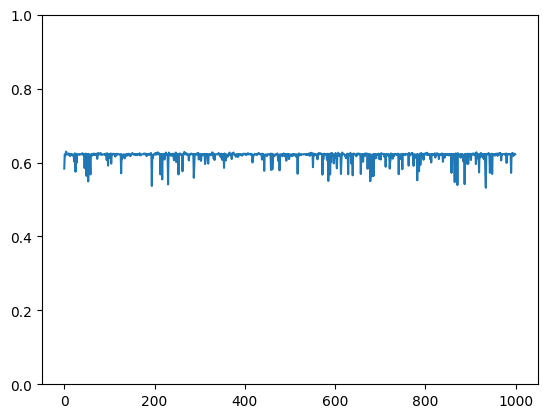

In [133]:
percept = Perceptron()
percept.fit(scaled_x_train, y_train.T[0], 10000, .01)

In [134]:
predictions_percept = percept.predict(scaled_x_test)
accuracy_percept = accuracy_score(predictions_percept, y_test)
print(f"Accuracy: {accuracy_percept:.2f}")

Accuracy: 0.59


In [135]:
print("Classification Report")
print(classification_report(y_test, predictions_percept, target_names=['Potable','Non-Potable']))

Classification Report
              precision    recall  f1-score   support

     Potable       0.60      0.97      0.74       979
 Non-Potable       0.43      0.04      0.07       659

    accuracy                           0.59      1638
   macro avg       0.52      0.50      0.41      1638
weighted avg       0.53      0.59      0.47      1638



# ***3. Naive Bayes***
Naive Bayes is an algorithm that uses prior and posterior class probabilites to predict outcomes. \
Till now we have used Naive Bayes for discrete input features, however in this project we have a continous data set. \
To tackle this we have used Normal distribution method. \
We have assumed that input features are noramlly distributed. \
In this we create a probability density function using mean and variance and then find the probabilities for various values of input features. \


In [136]:
class NaiveBayes:

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # calculate mean, var, and prior for each class
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):              # This loop iterates over each sample and calculates the mean var and priors for each feature
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)


    def predict(self, X):                                        #Predicition function for entire dataset
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []      #array to store posterior probabilities

        # calculate posterior probability for each class
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = posterior + prior
            posteriors.append(posterior)

        # return class with the highest posterior
        return self._classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x):                    # Normal Probability distribution function
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

In [137]:
nb = NaiveBayes()
nb.fit(scaled_x_train, y_train.flatten())
predictions_nb = nb.predict(scaled_x_test)

accuracy_nb = accuracy_score(y_test, predictions_nb)
print(f"Accuracy: {accuracy_nb:.2f}")

Accuracy: 0.60


In [138]:
print("Classification Report")
print(classification_report(y_test, predictions_nb, target_names=['Potable','Non-Potable']))

Classification Report
              precision    recall  f1-score   support

     Potable       0.64      0.74      0.69       979
 Non-Potable       0.50      0.38      0.43       659

    accuracy                           0.60      1638
   macro avg       0.57      0.56      0.56      1638
weighted avg       0.58      0.60      0.58      1638



# ***4. Random Forest***

Random Forest algorithm is an ensemble method that uses Decision trees and Bagging technique. \
To achieve this we have created two classes one for making the decision tree and the other for the Random Forest Algorithm. \
The Decision tree class uses gini index as impurity measure

In [139]:
class DecisionTree:
    def __init__(self, max_depth=None):
        # Constructor for the DecisionTree class
        # max_depth: maximum depth of the tree
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y, depth=0):
        # Method to fit the decision tree to the training data
        # X: feature matrix
        # y: target variable
        # depth: current depth of the tree
        num_samples, num_features = X.shape

        # Find the unique classes and their counts in the target variable
        unique_classes, counts = np.unique(y, return_counts=True)
        # Predict the class with the maximum count as the default prediction for the current node
        predicted_class = unique_classes[np.argmax(counts)]

        # Check stopping conditions: maximum depth reached or only one class in the node
        if depth == self.max_depth or len(unique_classes) == 1:
            self.tree = {'predicted_class': predicted_class}
            return

        # Find the best feature to split on and the corresponding threshold
        feature_index, threshold = self._best_split(X, y)
        # If no suitable split is found, assign the predicted class
        if feature_index is None:
            self.tree = {'predicted_class': predicted_class}
            return

        # Split the data into left and right branches based on the best split
        indices_left = X[:, feature_index] < threshold
        X_left, y_left = X[indices_left], y[indices_left]
        X_right, y_right = X[~indices_left], y[~indices_left]

        # Create a node in the tree with information about the split
        self.tree = {
            'feature_index': feature_index,
            'threshold': threshold,
            'left': DecisionTree(max_depth=self.max_depth),
            'right': DecisionTree(max_depth=self.max_depth)
        }

        # Recursively fit the left and right branches
        self.tree['left'].fit(X_left, y_left, depth + 1)
        self.tree['right'].fit(X_right, y_right, depth + 1)

    def _best_split(self, X, y):
        # Function to find the best feature and threshold for splitting the data based on Gini impurity

        # Get the number of samples and features
        num_samples, num_features = X.shape

        # If there's only one sample, no split is possible
        if num_samples <= 1:
            return None, None

        # Find the number of unique classes in the target variable
        num_classes = len(np.unique(y))

        # If there's only one class, no split is necessary
        if num_classes == 1:
            return None, None

        # Calculate Gini impurity of the parent node
        gini_parent = 1.0 - sum((np.sum(y == c) / num_samples) ** 2 for c in np.unique(y))

        # Initialize variables to store the best split information
        best_gini = 1.0
        best_feature_index = None
        best_threshold = None

        # Iterate through each feature to find the best split
        for feature_index in range(num_features):
            # Sort the data based on the values of the current feature
            thresholds, classes = zip(*sorted(zip(X[:, feature_index], y)))

            # Initialize arrays to keep track of class counts on the left and right sides of the split
            num_left = np.zeros((num_classes,))
            num_right = np.array([np.sum(y == c) for c in np.unique(y)])

            # Iterate through each sample to calculate Gini impurity for potential splits
            for i in range(1, num_samples):
                # Get the class of the previous sample
                c = classes[i - 1]

                # Update class counts on the left and right sides of the split
                num_left[c] += 1
                num_right[c] -= 1

                # Calculate Gini impurity for the left and right sides
                gini_left = 1.0 - sum((num_left[x] / i) ** 2 for x in np.unique(y))
                gini_right = 1.0 - sum((num_right[x] / (num_samples - i)) ** 2 for x in np.unique(y))

                # Calculate the weighted average Gini impurity for the potential split
                gini = (i * gini_left + (num_samples - i) * gini_right) / num_samples

                # Skip if the thresholds are equal (no split)
                if thresholds[i] == thresholds[i - 1]:
                    continue

                # Update the best split if a lower Gini impurity is found
                if gini < best_gini:
                    best_gini = gini
                    best_feature_index = feature_index
                    best_threshold = (thresholds[i] + thresholds[i - 1]) / 2

        # Return the best feature index and threshold for the split
        return best_feature_index, best_threshold

    def predict(self, X):
        # Method to predict the target variable for a given set of inputs
        return np.array([self._predict(inputs) for inputs in X])

    def _predict(self, inputs):
        # Recursive method to traverse the decision tree and make a prediction
        if 'predicted_class' in self.tree:
            # If the current node is a leaf, return the predicted class
            return self.tree['predicted_class']
        else:
            # If not a leaf, determine the next branch to traverse based on the input feature
            if inputs[self.tree['feature_index']] < self.tree['threshold']:
                # Recursively traverse the left branch
                return self.tree['left']._predict(inputs)
            else:
                # Recursively traverse the right branch
                return self.tree['right']._predict(inputs)





In [140]:
class RandomForest:
    def __init__(self, n_trees=10, max_depth=None):
        # Constructor for the RandomForest class
        # n_trees: number of decision trees in the forest
        # max_depth: maximum depth of each tree
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        # Method to fit the random forest to the training data
        # X: feature matrix
        # y: target variable
        for _ in range(self.n_trees):
            # Create a decision tree and fit it to a random subset of the data
            tree = DecisionTree(max_depth=self.max_depth)
            indices = np.random.choice(len(X), len(X), replace=True)
            tree.fit(X[indices], y[indices])
            # Add the trained tree to the forest
            self.trees.append(tree)

    def predict(self, X):
        # Method to make predictions using the random forest
        # Aggregate predictions from individual trees
        predictions = np.array([tree.predict(X) for tree in self.trees])
        # Return the majority class for each sample
        return np.array([np.argmax(np.bincount(predictions[:, i])) for i in range(len(X))])

In [141]:
random_forest = RandomForest(n_trees=4, max_depth=3)
random_forest.fit(scaled_x_train, y_train)
predictions_rf = random_forest.predict(scaled_x_test)
accuracy = accuracy_score(y_test, predictions_rf)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.61


In [142]:
print("Classification Report")
print(classification_report(y_test, predictions_rf, target_names=['Potable','Non-Potable']))

Classification Report
              precision    recall  f1-score   support

     Potable       0.61      0.99      0.75       979
 Non-Potable       0.76      0.05      0.09       659

    accuracy                           0.61      1638
   macro avg       0.68      0.52      0.42      1638
weighted avg       0.67      0.61      0.49      1638



# ***5. K - Nearest Neighbour (Based on research literature)***

KNN is a lazy learner algorithm, it is a non-parametric alogrithm. \
As the name suggests it uses the labels of its K - nearest neighbour datapoints to classify a point. \
The point is classified by a majority vote. \
In our code we have calculated the distance using the euclidean_distance function. \



In [143]:
import numpy as np


def euclidean_distance(x1, x2):                   # Simple distance between the two points in N - dimensional space
    distance = np.sqrt(np.sum((x1-x2)**2))
    return distance

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):                      # Iterates through the entire sample and runs the _predict function for each sample
        predicted_values = [self._predict(x) for x in X]
        return predicted_values

    def _predict(self, x):                         # Runs for a particular sample
        # computing the distance
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

        # get the closest k
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # majority vote
        vote_winner = Counter(np.array(k_nearest_labels).flatten().tolist()).most_common()
        return vote_winner[0][0]

In [144]:
knn_model = KNN(200)
knn_model.fit(scaled_x_train, y_train)
predictions_knn = knn_model.predict(scaled_x_test)
accuracy_knn = accuracy_score(y_test, predictions_knn)
print(f"Accuracy: {accuracy_knn:.2f}")

Accuracy: 0.60


In [145]:
print("Classification Report")
print(classification_report(y_test, predictions_knn, target_names=['Potable','Non-Potable']))

Classification Report
              precision    recall  f1-score   support

     Potable       0.60      1.00      0.75       979
 Non-Potable       1.00      0.01      0.01       659

    accuracy                           0.60      1638
   macro avg       0.80      0.50      0.38      1638
weighted avg       0.76      0.60      0.45      1638



# ***6. Comparison of insights drawn from the models***

In [146]:
##Confusion Matrix Visualization
def matrix_visualizer(conf_mat, title):
  plt.figure(figsize = (8,6), dpi = 100)
  ax = sns.heatmap(conf_mat, annot=True, fmt='d')
  ax.set_xlabel("Predicted Potability", fontsize = 14, labelpad = 20)
  ax.xaxis.set_ticklabels(['Potable','Non-Potable'])

  ax.set_ylabel("Actual Potability", fontsize = 14, labelpad = 20)
  ax.yaxis.set_ticklabels(['Potable','Non-Potable'])

  ax.set_title("Confusion Matrix for: {}".format(title))
  return ax

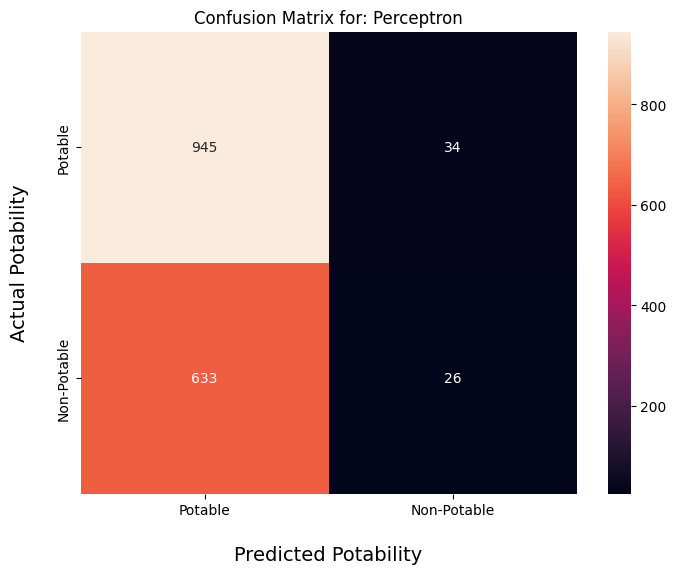

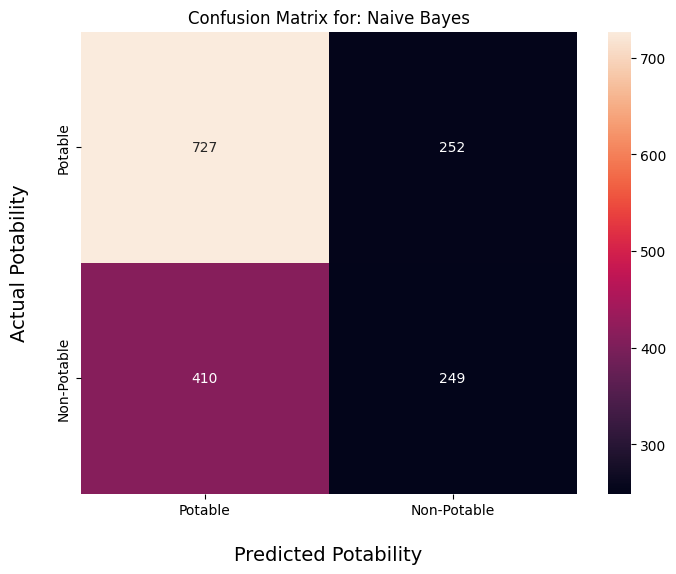

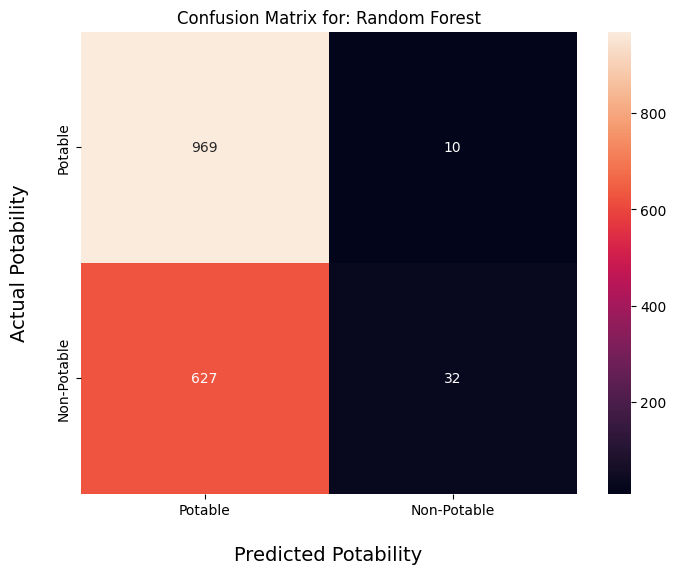

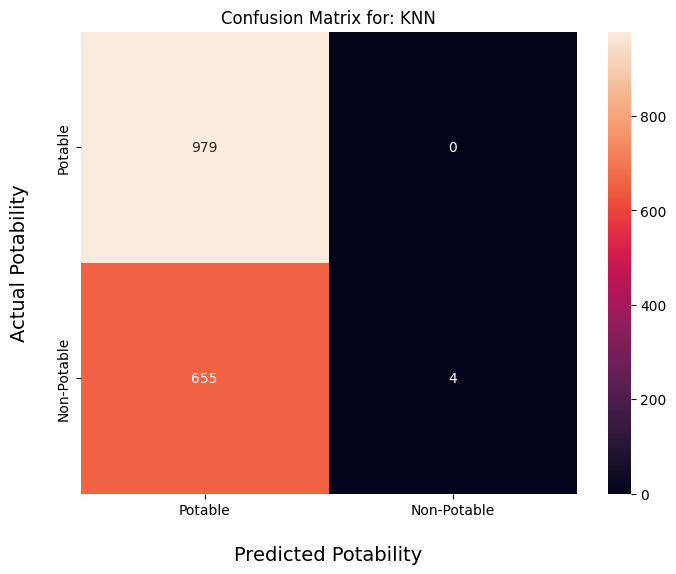

In [147]:
conf_mat_percept = confusion_matrix(y_test, predictions_percept)
conf_mat_nb = confusion_matrix(y_test, predictions_nb)
conf_mat_rf = confusion_matrix(y_test, predictions_rf)
conf_mat_knn = confusion_matrix(y_test, predictions_knn)

ax1 = matrix_visualizer(conf_mat_percept, "Perceptron")
ax2 = matrix_visualizer(conf_mat_nb, "Naive Bayes")
ax3 = matrix_visualizer(conf_mat_rf, "Random Forest")
ax4 = matrix_visualizer(conf_mat_knn, "KNN")



### Inferences


*   The dataset is non-linear in nature since algorithms that are used in non-linear classification such as Random Forest and KNN show better accuracy as compared to Perceptrons and Naive Bayes which are used for linearly seperable dataset.
*   KNN algorithm shows the best accuarcy (64%).
*   However, when we look at the confusion matrix and the classification report we see that KNN is highly accuracte for data points in potable class, but does not correctly classify most of the point in the Non-Potable class.
*   The other algorithms have quite comparable Recall Values, but their overall accuracy is less than KNN
*   Hence Overall accuracy may not be the best indicator of a good algorithm. Other factors like recall value and Precision should be considered while judging the algorithms








# **_7. References_**

The research papers used is: https://ieeexplore.ieee.org/abstract/document/7724478 \

Other Reference links are:
1.   https://numpy.org/doc/
2.   https://pandas.pydata.org/docs/
3.   https://scikit-learn.org/stable/modules/model_evaluation.html


